# Week 6. Optimization. Programming Task

### For grading

In [ ]:
#DO NOT CHANGE
import grading
import grading_utils

In [ ]:
#DO NOT CHANGE
grader = grading.Grader(assignment_key="BiQjKqu3RIyxwEW4WigmgA", 
                        all_parts=["C2ep5", "AVd3G", "Dkq1F", "OUwhX", "vjKMj", "uWwHK"])

In [ ]:
# token expires every 30 min
COURSERA_TOKEN = "pgD4x5jxtB19JXKQ"
COURSERA_EMAIL = "zayzev.mikhail@rambler.ru"

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [1]:
import numpy as np
import pandas as pd

### Task 1. Reading 

In [2]:
datX=np.load('x_train.npy')
datY=np.log(np.load('y_train.npy'))
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [ ]:
!pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

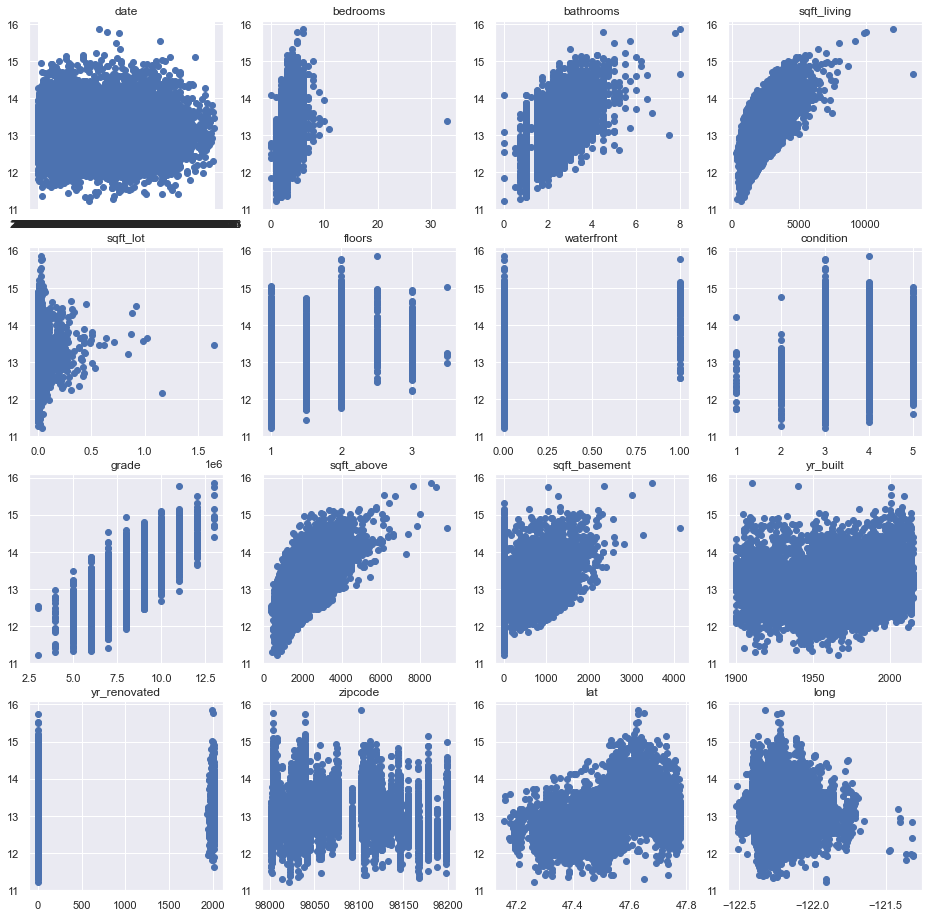

In [4]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [5]:
#your code goes here
feature_names = ["bedrooms","bathrooms","sqft_living","floors",
                 "condition","grade","sqft_above","sqft_basement","long","lat"]
X=datX[feature_names]
N=X.shape[0]
m=X.shape[1]
print(N,m)

15000 10


Run the following cells to automatically check results of your code:

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("C2ep5", grading_utils.test_reader(X, N, m))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$ function
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [6]:
def loss(w, X, y):
    N = X.shape[0]
    m = X.shape[1]
    b = np.ones([X.shape[0], 1])
    X = np.concatenate([b, X], axis=1)
    lossValue = (y -X@w).T @(y -X@w)/y.shape[0]
  
    return lossValue

Run the following cells to automatically check results of your code.

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("AVd3G", grading_utils.test_loss(loss, X, datY))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.


$$\large \begin{array}{rcl}\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{n} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \frac{1}{n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 \\
&=& \frac{1}{n} \left(\textbf{y} - \textbf{X} \textbf{w}\right)^{\text{T}} \left(\textbf{y} - \textbf{X} \textbf{w}\right)
\end{array}$$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = \frac{2}{n}\textbf{X}^{\text{T}}\left(\textbf{X} \textbf{w} -\textbf{y} \right)
\end{array} $$

### Task 4. Write a function to compute the gradient of the Loss function in the given point
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [7]:
def grad(w_k, X, y):
    N = X.shape[0]
    m = X.shape[1]
    b = np.ones([X.shape[0], 1])
    X = np.concatenate([b, X], axis=1)
    lossGradient = 2* X.T @(X@w_k -y)/y.shape[0]
    
    return lossGradient

Run the following cells to automatically check your function. 

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("Dkq1F", grading_utils.test_grad(grad, X, datY))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k}
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [8]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    curiter=0
    w_k=weights[-1]
    weights=weights[0].copy()
    #your code goes here
    while curiter < maxiter:
        grad_k = grad(w_k, X, y)
        if np.sqrt(grad_k@grad_k) < eps:
            print("Converged at {} iteration".format(curiter))
            break
        w_k -=  2 * alpha * grad_k
        lossValue_k=loss(w_k, X, y)
        weights=np.vstack((weights,w_k))
        losses.append(lossValue_k)
        curiter += 1
        if curiter%100 == 0:
            print("iter:",curiter,"grad len:", np.sqrt(grad_k.dot(grad_k)),"loss:",lossValue_k)
        
    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

In [24]:

X=datX[["bedrooms","bathrooms","sqft_living","floors","condition",
        "grade","sqft_above","sqft_basement","long","lat"]].copy()
y = datY.copy()

print("First experiment:")
w_init = np.random.normal(size=(X.shape[1]+1), scale=0.1)
alpha = 0.1e-7
weights_1, losses_1 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
dist1 = [np.linalg.norm(weights_1[i+1]-weights_1[i]) for i in range(len(weights_1)-1)]

print("Second experiment:")
alpha = 0.55e-7
w_init = np.random.normal(size=(X.shape[1]+1), scale=0.1)
weights_2, losses_2 = gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2)
dist2 = [np.linalg.norm(weights_2[i+1]-weights_1[i]) for i in range(len(weights_2)-1)]

First experiment:
iter: 100 grad len: 2756.920758196076 loss: 82.62909746418235
iter: 200 grad len: 1242.0449913675957 loss: 75.67225790583188
iter: 300 grad len: 943.1648116527307 loss: 73.4701462847258
iter: 400 grad len: 897.1652096387091 loss: 71.80016878316123
iter: 500 grad len: 883.3765841732849 loss: 70.21777591614308
Second experiment:
iter: 100 grad len: 7042865.819028406 loss: 1391102.3113822392
iter: 200 grad len: 26089294.172808975 loss: 19088822.3341861
iter: 300 grad len: 96644077.74426937 loss: 261941672.52927297
iter: 400 grad len: 358004233.5500927 loss: 3594433100.0324726
iter: 500 grad len: 1326175739.1897101 loss: 49323766832.6039


In [25]:
def plot_losses(losses_1, dist1, losses_2, dist2, title):
    fig, ax1 = plt.subplots(figsize=(10,8))
    ax1.plot(losses_1, color = 'r',linewidth=3,label="Experiment 1 Loss")
    ax1.plot(losses_2,color = 'g',linewidth=3,label="Experiment 2 Loss")
    ax2 = ax1.twinx()
    ax2.plot(dist1, color = 'r',linestyle='dashed',label="Experiment 1 weights distance")
    ax2.plot(dist2, color = 'g',linestyle='dashed',label="Experiment 2 weights distance")

    ax1.set_title(title, fontsize=18)
    ax1.set_xlabel("Iterations", fontsize=15)
    ax1.set_ylabel("Loss", fontsize=15)
    ax2.set_ylabel("Weights distance", fontsize=15)
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax1.legend(loc='upper left', fontsize=15)
    ax2.legend(loc='upper right', fontsize=15)
    ax2.grid(False)
    plt.tight_layout()

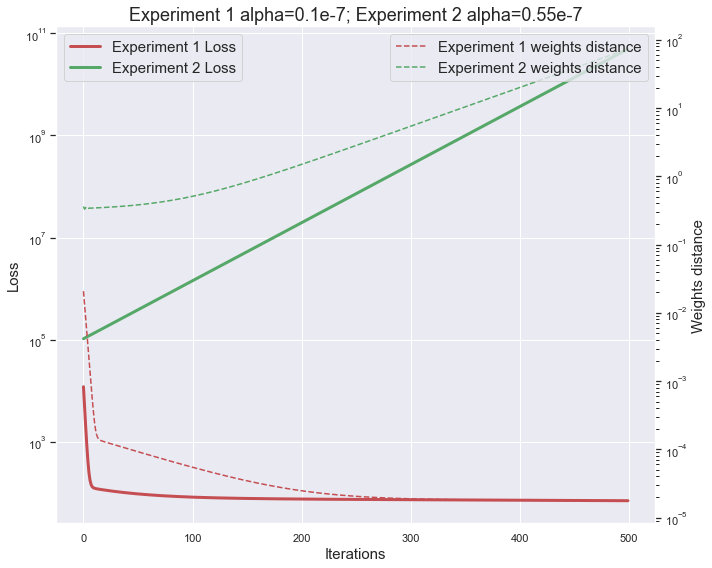

In [26]:
plot_losses(losses_1, dist1, losses_2, dist2,"Experiment 1 alpha=0.1e-7; Experiment 2 alpha=0.55e-7")

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [27]:
def analyze_regression(weights, losses, X, y, n=10, print_errors=True):
    
    ones = np.ones([X.shape[0], 1])
    y_hat = np.concatenate([ones, X], axis=1) @ weights[-1]
    
    if print_errors == True:
        #Print Y_hat:
        print("First {} results:".format(n))
        print("============================================")
        for i in range(n):
            print("True Y:",round(y[i],2),"Predicted Y:",round(y_hat[i],2), 
                  "Relative Error:", round(100*abs((y[i]-y_hat[i])/y[i]),1),"%") 
        print()

        #Print relative Error
        relative_error = 100*abs((y-y_hat)/y)
        print("Relative Error Analysis:")
        print("============================================")
        print("Min Relative Error:", np.min(relative_error))
        print("Mean Relative Error:", np.mean(relative_error))
        print("Max Relative Error:", np.max(relative_error))
        print()
    
    #Plot prediction and residuals:
    print("Printing charts of regression predictions:")
    print("============================================")
    residuals = y-y_hat

    fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,5))

    axs[0].set_title("observed-predicted scatterplot", fontsize=18)
    axs[0].scatter(y_hat, y, marker=".")
    axs[0].plot(range(int(min(y_hat)),int(max(y_hat))+2), range(int(min(y_hat)),int(max(y_hat))+2), "r--")
    axs[0].set_xlabel("$\widehat{y}$", fontsize=15)
    axs[0].set_ylabel("y", fontsize=15)

    axs[1].set_title("residuals-predicted scatterplot", fontsize=18)
    axs[1].scatter(y_hat, residuals, marker=".")
    axs[1].set_xlabel("$\widehat{y}$", fontsize=15)
    axs[1].set_ylabel("$y-\widehat{y}$", fontsize=15)

    axs[2].set_title("residuals distribution", fontsize=18)
    axs[2].hist(residuals, bins=30, density=True)
    axs[2].axvline(0, color='r', linestyle='dashed')
    axs[2].set_xlabel("$y-\widehat{y}$", fontsize=15)
    plt.tight_layout()

First 10 results:
True Y: 13.36 Predicted Y: 21.84 Relative Error: 63.5 %
True Y: 13.03 Predicted Y: 13.87 Relative Error: 6.4 %
True Y: 12.36 Predicted Y: 2.69 Relative Error: 78.3 %
True Y: 12.94 Predicted Y: 15.79 Relative Error: 22.1 %
True Y: 13.22 Predicted Y: 13.53 Relative Error: 2.3 %
True Y: 13.77 Predicted Y: 13.61 Relative Error: 1.2 %
True Y: 12.73 Predicted Y: 8.3 Relative Error: 34.8 %
True Y: 13.81 Predicted Y: 20.34 Relative Error: 47.3 %
True Y: 13.86 Predicted Y: 22.32 Relative Error: 61.0 %
True Y: 13.42 Predicted Y: 1.98 Relative Error: 85.2 %

Relative Error Analysis:
Min Relative Error: 0.00035341510867411375
Mean Relative Error: 53.29475396915263
Max Relative Error: 605.1974189264264

Printing charts of regression predictions:


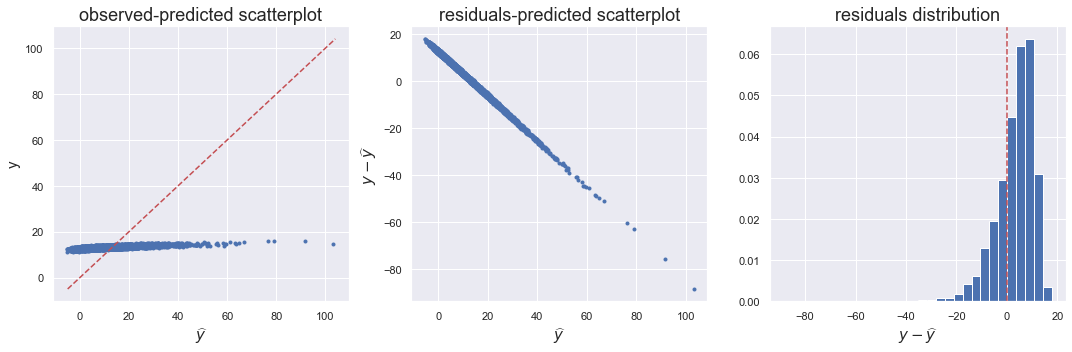

In [28]:
analyze_regression(weights_1, losses_1, X, y, n=10)

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

Despite of having reasonable Mean Relative Error, we can see from the 3 plots above, that the model is not adequate.  
1. The first problem could be observed on the left plot: we can see that on $Y-\widehat{Y}$ plot the predictions and true values don't lie on the line. That means that for some predictions we do significantly underestimate and for others we overestimate.  


2. Same problem is observed on the middle plot: the model error is dependent on predicted value. We can see that for bigger predicted values we have bigger negative error and for small error we have large positive error. This plot ideally should be Normal distributed.

3. And the third problem is observed on the right plot: its clearly seen that the error is not centered at $Y-\widehat{Y} = 0$. So the error is biased. And the majority of error values lies below zero, so the model tends to overestimate.  

The conclusion is that the model is not good enough.

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [29]:
def norm(X):
    X_normed = (X-np.mean(X,axis=0))/ np.std(X, axis=0)
    
    return X_normed

In [30]:
X_n = norm(X)

Run the following cell to automatically check your function. 

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("OUwhX", grading_utils.test_norm(norm(X)))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

In [31]:
def plot_weights(weights1, weights2, feature_names):
    feature_names_p = ["bias"]
    feature_names_p.extend(feature_names)
    labels = ["w_{index}_{name}".format(index=i, name=feature_names_p[i]) for i in range(len(weights1[-1]))]
    weights1_p = weights1[-1]
    weights2_p = weights2[-1]

    x = np.arange(len(labels)) 
    width = 0.35  

    fig, ax = plt.subplots(figsize=(12,5))
    ax2 = ax.twinx()

    rects1 = ax.bar(x[1:] - width/2, weights1_p[1:], width, label="Experiment 1")
    rects2 = ax.bar(x[1:] + width/2, weights2_p[1:], width, label="Experiment 2")
    bias1 = ax2.bar(x[0] - width/2, weights1_p[0], width, label="Experiment 1")
    bias2 = ax2.bar(x[0] + width/2, weights2_p[0], width, label="Experiment 2")
    ax.set_ylabel('Values')
    ax.set_ylabel('Values bias')
    ax.set_title('Weights')
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=40)
  
    ax2.grid(False)
    ax2.legend()

    plt.tight_layout()

In [32]:
print("First experiment:")
w_init = np.random.normal(size=(X.shape[1]+1), scale=0.5)
X_n = norm(X)
alpha = 0.01
weights_1_n, losses_1_n = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
dist1_n = [np.linalg.norm(weights_1_n[i+1]-weights_1_n[i]) for i in range(len(weights_1_n)-1)]

print("Second experiment:")
alpha = 0.05
w_init = np.random.normal(size=(X.shape[1]+1), scale=0.5)
weights_2_n, losses_2_n = gradDescent(w_init, alpha, X_n, y, maxiter=500, eps=1e-2)
dist2_n = [np.linalg.norm(weights_2_n[i+1]-weights_2_n[i]) for i in range(len(weights_2_n)-1)]

First experiment:
iter: 100 grad len: 0.4939821576226458 loss: 0.13869644320636676
iter: 200 grad len: 0.030910084022342882 loss: 0.07790015428555347
iter: 300 grad len: 0.01093343730644285 loss: 0.07713322579211335
Converged at 308 iteration
Second experiment:
Converged at 76 iteration


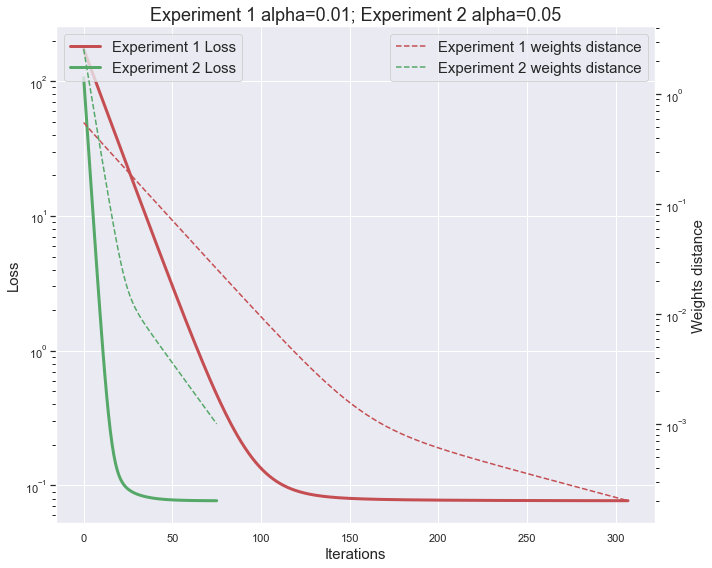

In [33]:
plot_losses(losses_1_n, dist1_n, losses_2_n, dist2_n,"Experiment 1 alpha=0.01; Experiment 2 alpha=0.05")

First 10 results:
True Y: 13.36 Predicted Y: 13.5 Relative Error: 1.0 %
True Y: 13.03 Predicted Y: 13.25 Relative Error: 1.7 %
True Y: 12.36 Predicted Y: 12.31 Relative Error: 0.5 %
True Y: 12.94 Predicted Y: 12.86 Relative Error: 0.6 %
True Y: 13.22 Predicted Y: 13.43 Relative Error: 1.6 %
True Y: 13.77 Predicted Y: 13.39 Relative Error: 2.8 %
True Y: 12.73 Predicted Y: 12.77 Relative Error: 0.3 %
True Y: 13.81 Predicted Y: 13.94 Relative Error: 1.0 %
True Y: 13.86 Predicted Y: 13.72 Relative Error: 1.0 %
True Y: 13.42 Predicted Y: 12.95 Relative Error: 3.5 %

Relative Error Analysis:
Min Relative Error: 0.00025587601665457983
Mean Relative Error: 1.6349292059680374
Max Relative Error: 13.377061677742688

Printing charts of regression predictions:


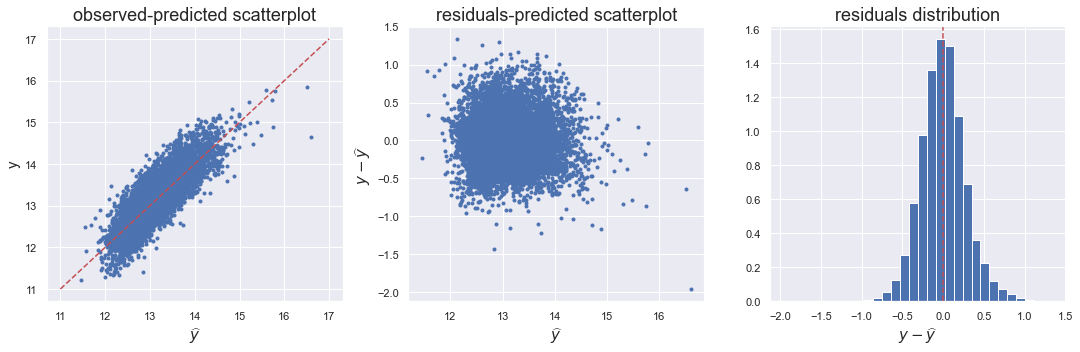

In [34]:
analyze_regression(weights_1_n, losses_1_n, X_n, y, n=10)

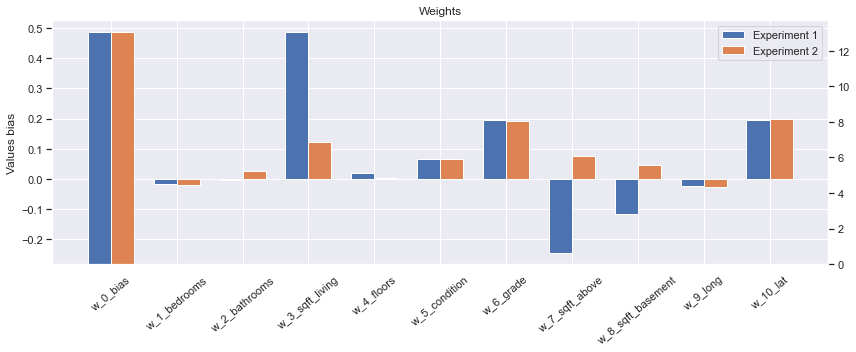

In [35]:
plot_weights(weights_1_n, weights_2_n, feature_names)

The weight for both experiments are not identical, but they looks similar. And taking into the account that the data X was normed and absolute values of weights the differance is not too big.  
It is obvious that the bigges impact here comes from the bias term, than goes sqft_living, lat, grade and sqft_above. 4 out of 5 of them are pretty close for both experiments.

### Task 8. Better pay twice (2 points)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [36]:
def new_loss(w, X, y, a, b):
    N = X.shape[0]
    m = X.shape[1]
    ones = np.ones([X.shape[0], 1])
    X = np.concatenate([ones, X], axis=1)
    y_hat = X@w

    A = (a*(y > y_hat)+b*(y<=y_hat))
    lossValue = A*(y -y_hat).T @(y -y_hat)/y.shape[0]
  
    return lossValue


def new_grad(w_k, X, y, a, b):
    N = X.shape[0]
    m = X.shape[1]
    ones = np.ones([X.shape[0], 1])
    X = np.concatenate([ones, X], axis=1)
    y_hat = X@w_k
    A = (a*(y > y_hat)+b*(y<=y_hat))
    lossGradient = 2 *A* X.T@(X@w_k - y)/y.shape[0]
    
    return lossGradient

In [37]:
X=norm(X)

Run the following cells to automatically check results of your code.

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("vjKMj", grading_utils.test_new_loss(new_loss, X, datY))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Run the following cells to automatically check results of your code.

In [ ]:
## GRADED PART, DO NOT CHANGE!
grader.set_answer("uWwHK", grading_utils.test_new_grad(new_grad, X, datY))

In [ ]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [38]:
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]
    curiter=0
    w_k=weights[-1]
    weights=weights[0].copy()

    while curiter < maxiter:
        grad_k = new_grad(w_k, X, y, a, b)
        if np.sqrt(grad_k@grad_k) < eps:
            print("Converged at {} iteration".format(curiter))
            break
        w_k -=  2 * alpha * grad_k
        lossValue_k=new_loss(w_k, X, y, a, b)
        weights=np.vstack((weights,w_k))
        losses.append(lossValue_k)
        curiter += 1
        if curiter%100 == 0:
            print("iter:",curiter,"grad len:", np.sqrt(grad_k.dot(grad_k)),"loss:",lossValue_k)
        
    return weights, losses

In [39]:
print("First experiment:")
w_init = np.random.normal(size=(X.shape[1]+1), scale=0.1)
X_n = norm(X)

alpha = 0.01
a = 10
b=1
weights_1_new, losses_1_new = new_gradDescent(w_init, alpha, X_n, y, a, b, maxiter=500, eps=1e-2)
dist1_new = [np.linalg.norm(weights_1_new[i+1]-weights_1_new[i]) for i in range(len(weights_1_new)-1)]

print("Second experiment:")
alpha = 0.01
a = 1
b=10
w_init = np.random.normal(size=(X.shape[1]+1), scale=0.1)
weights_2_new, losses_2_new = new_gradDescent(w_init, alpha, X_n, y, a, b, maxiter=500, eps=1e-2)
dist2_new = [np.linalg.norm(weights_2_new[i+1]-weights_2_new[i]) for i in range(len(weights_2_new)-1)]

First experiment:
Converged at 74 iteration
Second experiment:
iter: 100 grad len: 0.2531068364464211 loss: 0.19980049892002777
Converged at 145 iteration


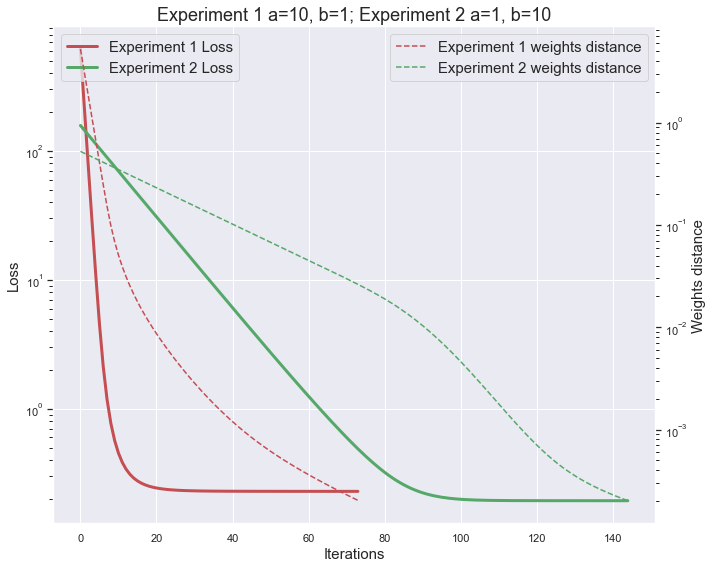

In [40]:
plot_losses(losses_1_new, dist1_new, losses_2_new, dist2_new,"Experiment 1 a=10, b=1; Experiment 2 a=1, b=10")

Printing charts of regression predictions:
Printing charts of regression predictions:


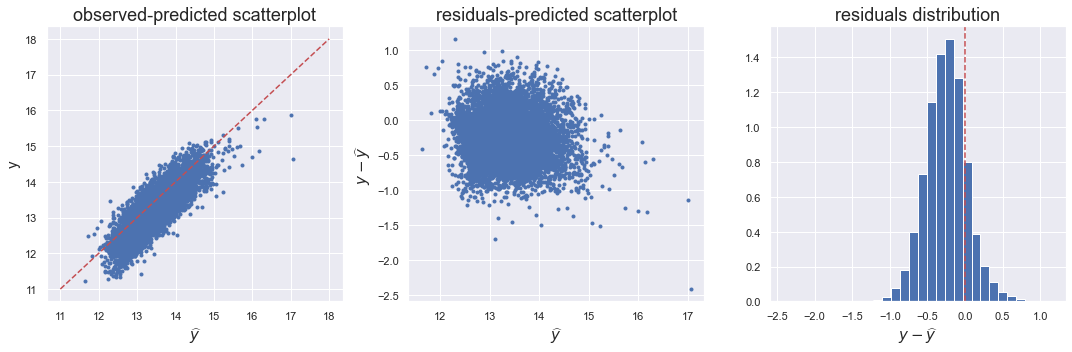

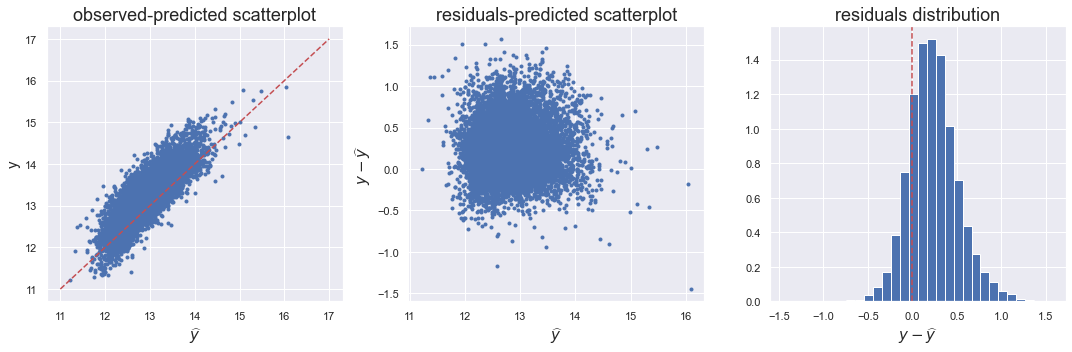

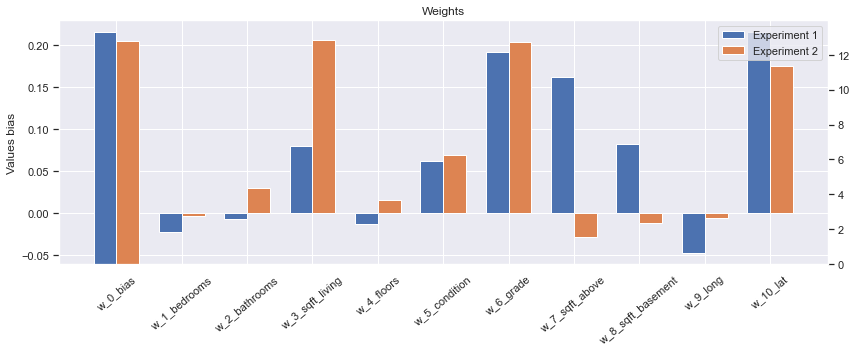

In [41]:
analyze_regression(weights_1_new, losses_1_new, X_n, y, 10, False)
analyze_regression(weights_2_new, losses_2_new, X_n, y, 10, False)
plot_weights(weights_1_new, weights_2_new, feature_names)

In [42]:
losses_1_new[-1],losses_2_new[-1]

(0.22899977628967383, 0.19377856105146735)

In [ ]:
X_cor = X_n.copy()
X_cor["Target"] = y
correlations = X_cor.corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlations,cmap="coolwarm")
plt.show()

In [ ]:
weights_diff = abs((weights_1_new[-1] - weights_2_new[-1]))
print("Biggest weights difference:")
print("================================")
print(*[str(feature_names[i])+" diff:"+str(round(weights_diff[i+1],3)) 
        for i in np.argsort(weights_diff[1:])[::-1][:5]], sep="\n")
corr_sorted = np.argsort(np.array(correlations["Target"][:-1]))[::-1]
print()
print("Biggest feature correlation:")
print("================================")
print(*[str(feature_names[i])+" corr:"+str(round(correlations["Target"][i],3)) 
        for i in corr_sorted][:5], sep="\n")


### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

### 1. Have you managed to get sufficiently different weights with different  𝛼  or  (𝑎,𝑏)  parameters of assymetry? What does it mean?


In [ ]:
plot_weights(weights_1_new, weights_2_new, feature_names)

There are some differences in weights with extreme opposite values of a and b. For the first experiment **a=10**, **b=1** and for the second **a=1** and **b=10**.  The corresponding biggest absolute differences in weights are:  
Biggest weights difference:  

**sqft_living diff: 0.061**   
**long diff: 0.043**  
**lat diff: 0.042**  
**bathrooms diff: 0.04**  
**sqft_above diff: 0.031** 

In [ ]:
correlations["Target"]

All of the features except **long** are in top 5 features in terms of correlation with target value. So it all seems logical, that the most correlated features have biggest change when we modify loss function and penalize more for overestimating.  

Feature **long** has very low correlation with target so big change in feature weight will not affect the prediction as much as changing weights of high correlated features. So this big change is also logical.

### 2. Assume  𝑎  and  𝑏  are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume  𝑎=1  and choosing only  𝑏 ).

From the question itself, I can assume that if we for some reason need the assymetric cost function, than our real costs are different for overestimating and underestimating.  
Thus we should know what the upper bound of probability we want for overestimating. Let us call it Treshold_value.
And our goal is to set **b** parameter such that our predictions will be overestimating the target value with $P((y_{t}-\hat{y}_{t})>0) < Threshold\_value\quad$.  

**Analytical approach:**

Loss function: 
$$ \mathcal{L}(y_{t} -\hat{y}_{t})= \begin{cases} a(y_{t}-\hat{y}_{t})^2, \quad y_{t}>\hat{y}_{t} \\ b(y_{t}-\hat{y}_{t})^2, \quad y_{t}\le\hat{y}_{t} \end{cases}
$$
Expectation of Loss function: 
$$ E_t(\mathcal{L}(y_{t} -\hat{y}_{t})) = a \int_{\hat{y}_{t}}^\infty (y_{t}-\hat{y}_{t})^2 f(y_{t}|\Omega_t)\,d{y_{t}} + b \int_{-\infty}^{\hat{y}_{t}} (y_{t}-\hat{y}_{t})^2 f(y_{t}|\Omega_t)\,d{y_{t}}$$
Differentiating with respect to predictor: 
$$ 0 = a \int_{\hat{y}_{t}}^\infty (y_{t}-\hat{y}_{t}) f(y_{t}|\Omega_t)\,d{y_{t}} + b \int_{-\infty}^{\hat{y}_{t}} (y_{t}-\hat{y}_{t}) f(y_{t}|\Omega_t)\,d{y_{t}}$$ 
To  solve this analytically we need to know: $f(\hat{y}_{t}|\Omega_t)$ which depends on $\Omega_t$ and $\Omega_t$ is changing during gradient descend.  
Thus I assume the empirical approach will be more suitable.
 
 
**Empirical approach:**
    
1. Start with **b=a**, initial $\Omega_t$ and set **Treshold_value** for the desired probability of overestimating.
2. Obtain $\Omega_t$ by gradient descend.
3. Compute predictions: $\hat{y}_{t}$
3. Compute the CDF of $F_{y_{t} -\hat{y}_{t}}(0)$  
4. And while CDF  $\quad F_{y_{t} -\hat{y}_{t}}(0) >  Threshold\_value\quad $ increase **b** and start from step 2.

  
In this way we gradually will obtain the desired distribution of error residuals with target probability for overestimating. Similar to the **residuals distribution** plots on the charts below:

In [ ]:
analyze_regression(weights_1_new, losses_1_new, X_n, y, 10, False)
analyze_regression(weights_2_new, losses_2_new, X_n, y, 10, False)